## Data cleaning template for R modeling 

- added the new 200 data points from Prolific 2
- to compare how the new data's mobility values are different from the previous
- final update: 15th May, included engine information

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [107]:
# loading the csv file for the collected responses as of "date" - data 1

df = pd.read_csv('data\CO2-Rechner_February+27,+2024_20.14.csv', header = 0)

pd.set_option('display.max_columns', None)
df.head(9)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q1,Q2.1,Q3,Q4,Q5,Q6,Q7,Q1.1,Q3.1,Q4.1,Q5.1,Q7.1,Q8,Q9,Q11,Q12,Q13,Q15,Q16,Q17,Q19,Q20,Q21,Q1.2,Q1.3,Q1.4,Q2.2,Q3.2,Q4.2,Q1.5,Q2.3,Q4.3,Q5.2,Q6.1,Q3.3,Q1.6,Q2.4,Q3.4,Q4.4,Q2_1,Q2_2,Q2_4,Q2_5,Q8_14,Q2_1.1,Q2_2.1,Q2_4.1,Q1_1,Q1_2,Q1_3,Q1_5,Q2_2.2,Q2_4.2,Q2_6,Q2_7,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q4.5,Q5.3,Q1.7,Q1.8,Q2.5,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q4.6,Q5.4,m,Faktor_Haushaltsmitglieder,Faktor_Haustyp,Faktor_Baujahr,Faktor_Quadratmeter,Faktor_Heizungsart,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,Business_Europa,Business_Transkontinental,CO2_ÖPNV,CO2_Auto1,Faktor_Kraftstoff,Verbrauch,Faktor_Kraftstoff2,Verbrauch2,Jährliche_Fahrleistung,CO2_Auto2,Faktor_Kraftstoff3,Verbrauch3,Faktor_Kraftstoff4,Verbrauch4,Jährliche_Fahrleistung2,CO2_Auto3,Faktor_Kraftstoff5,Verbrauch5,Faktor_Kraftstoff6,Verbrauch6,Jährliche_Fahrleistung3,CO2_Auto4,Faktor_Kraftstoff7,Verbrauch7,Faktor_Kraftstoff8,Verbrauch8,Jährliche_Fahrleistung4,CO2_Auto5,Faktor_Kraftstoff9,Verbrauch9,Faktor_Kraftstoff10,Verbrauch10,Jährliche_Fahrleistung5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,Faktor_Haushaltseinkommen,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,CO2_Tonnen,CO2_Tonnen_Gerundet,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt,CO2_Vergleichsperson,signal,sum_donations,Durchschnitt_Wohnen_Strom,Durchschnitt_Mobilität,Durchschnitt_Ernährung,Durchschnitt_Sonstiger_Konsum,Vergleich_Wohnen_Strom,Vergleich_Mobilität,Vergleich_Ernährung,Vergleich_Sonstiger_Konsum
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Sind Sie über 18 Jahre alt?,Wie viele Personen wohnen in Ihrem Haushalt?,Welchen Haustyp bewohnen Sie?,Baujahr bzw. Standard des Gebäudes in dem Sie ...,Auf wieviel Quadratmeter Wohnfläche wohnen Sie?,Womit wird die von Ihnen bewohnte Immobilie ge...,Haben Sie einen Ökostrom?,Wie hoch ist ihr Haushaltsstrom Jahresverbrauc...,Wie viele Autos besitzen Sie?,Was ist die primäre Kraftstoffart Ihres 1. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 1. Fa...,Was ist die primäre Kraftstoffart Ihres 2. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 2. Fa...,Was ist die primäre Kraftstoffart Ihres 3. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 3. Fa...,Was ist die primäre Kraftstoffart Ihres 4. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 4. Fa...,Was ist die primäre Kraftstoffart Ihres 5. Fah...,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 5. Fa...,Nutzen Sie öffentliche Verkehrsmittel?,Wie viele Tage im Jahr sind Sie auf Kreuzfahrt?,Wie viele Stunden im Jahr fliegen Sie innerhal...,Wie viele Stunden davon Business Class?,Wie viele Stunden im Jahr fliegen Sie transkon...,Wie viele Stunden davon Business Class oder Fi...,Was entspricht am ehesten Ihren Ernährungsgewo...,Wie oft kaufen Sie saisonale und regionale Pro...,Aktivitätslevel (Altag und Sport),Geschlecht,Alter,Körpergewicht (in kg),Was beschreibt Ihr Kaufverhalten am ehesten?,Was beschreibt Ihre Kaufkriterien am ehesten?,Wie oft kaufen sie Gebrauchtware?,Wie hoch ist Ihr monatliches Haushaltsnettoein...,"Bevor Sie mit Ihren Einschätzungen beginnen, b...","Bevor Sie mit Ihren Einschätzungen beginnen, b...","Bevor Sie mit Ihren Einschätzungen beginne

In [108]:
#old df_selected = df.iloc[1:, [25, 50, 51, 56, 61, 83, 86, 87, 88, 89, 90, 91, 92, 93, 95, 101, 102, 103, 104, 105, 108, 109, 115, 121, 127, 133, 139, 140, 141, 143, 144, 145]]

## adding engines: 26, 27, 29, 30, 32, 33, 35, 36, 38, 39

df_selected = df.iloc[2:, [25, 50, 51, 56, 87, 90, 91, 92, 93, 94, 95, 96, 97, 99, 106, 107, 108, 109, 110, 113, 114, 120, 126, 132, 138, 144, 145, 146, 148, 149, 150, 153, 154, 155, 156, 157,  26, 27, 29, 30, 32, 33, 35, 36, 38, 39]]

df_selected.head(10)

,Q1.1,Q5.2,Q6.1,Q4.4,Q1.7,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q5.4,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,CO2_ÖPNV,CO2_Auto1,CO2_Auto2,CO2_Auto3,CO2_Auto4,CO2_Auto5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt,Q3.1,Q4.1,Q7.1,Q8,Q11,Q12,Q15,Q16,Q19,Q20
2,1,Männlich,36,2500,SPD,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...","(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Männlich,60,1000,Bündnis 90/Die Grünen,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Männlich,57,6500,7,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Männlich,36,6500,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,Männlich,31,2500,AfD,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,78054,1539.17575,32.66666666666666666667,1571.84241666666666666667,6504,12466.36,107.8,0,640.614,0,0,0,640.614,19718.774,1989.363878304,1926.505,1152,26358.48529497066666666667,10,16,34,NaN,10,Strom (bereits in Wohnen enthalten),NaN,Strommix Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,Weiblich,63,1500,7,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,NaN,NaN,NaN,NaN,42369,2026.5,47.6,2074.1,0,0,107.8,0,0,0,0,0,0,107.8,1268.882554764,2091.634,1152,6694.416554764,76,62,55,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,Männlich,45,1500,CDU/CSU,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,01904,3024.864,429,3453.864,0,0,0,268.6365,0,0,0,0,268.6365,268.6365,2264.353344,2427.3963,1152,9566.250144,39,11,38,NaN,20,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,Weiblich,41,1900,7,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,NaN,NaN,NaN,NaN,28237,1875.96,663,2538.96,0,266,107.8,1669.509,0,0,0,0,1669.509,2043.309,1305.892481256,2317.6,1152,9357.761481256,65,50,25,NaN,70,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2,Weiblich,70,5400,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,12209,2722.0275,42.7,2764.7275,0,931,0,1432.728,895.455,0,0,0,2328.183,3259.183,1259.6045137995,4117.9044375,1152,12553.4194512995,53,20,51,NaN,60,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df_selected.columns.values

array(['Q1.1', 'Q5.2', 'Q6.1', 'Q4.4', 'Q1.7', 'Q3_1.1', 'Q3_2.1',
       'Q3_3.1', 'Q3_4.1', 'Q3_5.1', 'Q3_6.1', 'Q3_7.1', 'Q3_8.1', 'Q5.4',
       'CO2_Wohnen', 'CO2_Strom', 'CO2_Wohnen_Strom', 'CO2_ Kreuzfahrt',
       'CO2_Flugreisen', 'CO2_ÖPNV', 'CO2_Auto1', 'CO2_Auto2',
       'CO2_Auto3', 'CO2_Auto4', 'CO2_Auto5', 'CO2_Auto_Gesamt',
       'CO2_Mobilität', 'CO2_Ernährung', 'CO2_Sonstiger_Konsum',
       'Öffentliche_emissionen', 'CO2_Gesamt',
       'Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität',
       'Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt', 'Q3.1', 'Q4.1', 'Q7.1', 'Q8', 'Q11', 'Q12',
       'Q15', 'Q16', 'Q19', 'Q20'], dtype=object)

In [110]:
# Rename the columns 

df_selected = df_selected.rename(columns={'Q1.1': 'no_cars', 'Q5.2': 'gender', 'Q6.1': 'age', 'Q4.4': 'income', 
       'Q1.7': 'political_party', 
       'Q3_1.1': 'education1', 'Q3_2.1': 'education2', 'Q3_3.1': 'education3',
       'Q3_4.1': 'education4', 'Q3_5.1': 'education5', 'Q3_6.1': 'education6', 'Q3_7.1': 'education7', 'Q3_8.1': 'education8', 
       'Q5.4': 'postal_code', 'CO2_Wohnen': 'CO2_housing', 'CO2_Strom' : 'CO2_electricity', 'CO2_Wohnen_Strom': 'CO2_housing_electricity', 
       'CO2_ Kreuzfahrt': 'CO2_cruise', 'CO2_Flugreisen': 'CO2_flight', 'CO2_ÖPNV': 'CO2_public_transport', 'CO2_Auto1': 'CO2_car1', 
       'CO2_Auto2' : 'CO2_car2',
       'CO2_Auto3' : 'CO2_car3', 'CO2_Auto4': 'CO2_car4', 'CO2_Auto5': 'CO2_car5', 'CO2_Auto_Gesamt' : 'CO2_car_total',
       'CO2_Mobilität': 'CO2_mobility', 'CO2_Ernährung': 'CO2_food', 'CO2_Sonstiger_Konsum': 'CO2_other_consumption',
       'Öffentliche_emissionen': 'public_emission', 'CO2_Gesamt': 'CO2_total', 
       'Einschätzung_Wohnen_Strom': 'belief_housing_electricity', 'Einschätzung_Mobilität': 'belief_mobility',
       'Einschätzung_Ernährung': 'belief_food', 'Einschätzung_Sonstiger_Konsum': 'belief_other_consumption', 'Einschätzung_Gesamt': 'belief_total',
        'Q3.1': 'engine_1', 'Q4.1': 'engine_2', 'Q7.1': 'engine_3', 'Q8': 'engine_4', 'Q11': 'engine_5', 'Q12': 'engine_6',
       'Q15': 'engine_7', 'Q16': 'engine_8', 'Q19': 'engine_9', 'Q20': 'engine_10'})


In [111]:
## Creating the first batch of the collected responses
data_1 = df_selected.copy()

In [112]:
len(data_1)

438

In [113]:
## adding the batch info 
df_selected['batch'] = 1

### 2nd dataset collected

In [114]:
#### load the dataset

df_prolific = pd.read_csv('data\Carbon+Beliefs+-+Prolific_March+10,+2024_14.10.csv', header = 0)

df_prolific.head(10)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q1,Q1.1,Q2.1,Q3,Q4,Q5,Q6,Q7,Q1.2,Q3.1,Q4.1,Q5.1,Q6.1,Q8,Q9,Q10,Q11,Q13,Q14,Q15,Q16,Q18,Q19,Q20,Q21,Q23,Q24,Q25,Q26,Q1.3,Q1.4,Q1.5,Q2.2,Q3.2,Q4.2,Q1.6,Q2.3,Q3.3,Q4.3,Q5.2,Q6.2,Q1.7,Q2.4,Q3.4,Q4.4,Q2_1,Q2_2,Q2_4,Q2_5,Q8_14,Q9_1,Q9_2,Q9_3,Q1_1,Q1_2,Q1_3,Q1_5,Q2_2.1,Q2_4.1,Q2_6,Q2_7,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,Q3_7,Q3_8,Q3_9,Q3_10,Q3_11,Q3_12,Q4.5,Q5.3,Q6_4,Q1.8,Q1.9,Q2.5,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q4.6,Q5.4,Q6.3,PROLIFIC_PID,Faktor_Haushaltsmitglieder,Faktor_Haustyp,Faktor_Baujahr,Faktor_Quadratmeter,Faktor_Heizungsart,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,Business_Europa,Business_Transkontinental,CO2_ÖPNV,CO2_Auto1,Faktor_Kraftstoff,Verbrauch,Faktor_Kraftstoff2,Verbrauch2,Jährliche_Fahrleistung,CO2_Auto2,Faktor_Kraftstoff3,Verbrauch3,Faktor_Kraftstoff4,Verbrauch4,Jährliche_Fahrleistung2,CO2_Auto3,Faktor_Kraftstoff5,Verbrauch5,Faktor_Kraftstoff6,Verbrauch6,Jährliche_Fahrleistung3,CO2_Auto4,Faktor_Kraftstoff7,Verbrauch7,Faktor_Kraftstoff8,Verbrauch8,Jährliche_Fahrleistung4,CO2_Auto5,Faktor_Kraftstoff9,Verbrauch9,Faktor_Kraftstoff10,Verbrauch10,Jährliche_Fahrleistung5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,Faktor_Haushaltseinkommen,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,CO2_Tonnen,CO2_Tonnen_Gerundet,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt,high_moral,CO2_Vergleichsperson_1,CO2_Vergleichsperson_2,signal,sum_donations,Durchschnitt_Wohnen_Strom,Durchschnitt_Mobilität,Durchschnitt_Ernährung,Durchschnitt_Sonstiger_Konsum,Vergleich_Wohnen_Strom,Vergleich_Mobilität,Vergleich_Ernährung,Vergleich_Sonstiger_Konsum
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Sind Sie über 18 Jahre alt?,Mit dieser Frage möchten wir Ihre Aufmerksamke...,Wie viele Personen wohnen in Ihrem Haushalt?,Welchen Haustyp bewohnen Sie?,"Baujahr bzw. Standard des Gebäudes, in dem Sie...",Auf wieviel Quadratmeter Wohnfläche wohnen Sie?,Womit wird die von Ihnen bewohnte Immobilie be...,Haben Sie einen Ökostromtarif?,Wie hoch ist ihr Haushaltsstrom Verbrauch in K...,Wie viele Autos besitzen Sie?,Was ist die primäre Kraftstoffart Ihres 1. Fah...,Ist Ihr 1. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 1. Fa...,Was ist die primäre Kraftstoffart Ihres 2. Fah...,Ist Ihr 2. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 2. Fa...,Was ist die primäre Kraftstoffart Ihres 3. Fah...,Ist Ihr 3. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 3. Fa...,Was ist die primäre Kraftstoffart Ihres 4. Fah...,Ist Ihr 4. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 4. Fa...,Was ist die primäre Kraftstoffart Ihres 5. Fah...,Ist Ihr 5. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 5. Fa...,Nutzen Sie öffentliche Verkehrsmittel?,Wie viele Tage im Jahr sind Sie auf Kreuzfahrt?,Wie viele Stunden im Jahr fliegen Sie innerhal...,Wie viele Stunden davon Business Class?,Wie viele Stunden im Jahr fliegen Sie transkon...,Wie viele Stunden davon Business Class oder Fi...,Was entspricht am ehesten Ihren Ernährungsgewo...,Wie oft kaufen Sie saisonale und regionale Pro...,Aktivitätslevel (Altag und Sport),Geschlecht,Alter,Körpergewicht (in kg),Was beschreibt Ihr Kaufverhal

In [115]:
# Select the columns with the variables of interests 

## adding engines: 27, 29, 31, 33, 35, 37, 39, 41, 43, 45 


df_prolific = df_prolific.iloc[2:, [26, 56, 57, 62, 94, 97, 98, 99, 100, 101, 102, 103, 104, 106, 114, 115, 116, 117, 118, 121,
                                   122, 128, 134, 140, 146, 152, 153, 154, 156, 157, 158, 161, 162, 163, 164, 165, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45 ]]
                                   

df_prolific.head(10)

,Q1.2,Q4.3,Q5.2,Q4.4,Q1.8,Q3_1.1,Q3_2.1,Q3_3.1,Q3_4.1,Q3_5.1,Q3_6.1,Q3_7.1,Q3_8.1,Q5.4,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,CO2_ÖPNV,CO2_Auto1,CO2_Auto2,CO2_Auto3,CO2_Auto4,CO2_Auto5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt,Q3.1,Q5.1,Q8,Q10,Q13,Q15,Q18,Q20,Q23,Q25
2,2,Männlich,39,4000,Einer anderen Partei,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,44329,1396.548,35,1431.548,0,1995,0,6492.535,1790.91,0,0,0,8283.445,10278.445,2280.3496786125,3041.85,1152,18184.1926786125,15,10,15,20,20,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Männlich,38,5000,SPD,NaN,NaN,NaN,NaN,NaN,NaN,Doktorgrad oder Habilitation,NaN,76135,739.2503125,29.4,768.6503125,0,3394,107.8,0,0,0,0,0,0,3501.8,1486.8315,1372.6348125,1152,8281.916625,65,85,50,45,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Männlich,45,2500,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,55118,2501.28,47.6,2548.88,0,9824,107.8,0,0,0,0,0,0,9931.8,1939.5646116,3568.8505125,1152,19141.0951241,65,70,60,65,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Männlich,22,4900,Bündnis Sarah Wagenknecht,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,37124,840,32.66666666666666666667,872.66666666666666666667,0,6960,107.8,540.642,89.5455,0,0,0,630.1875,7697.9875,1698.41632092,2027.9,1152,13448.97048758666666666667,35,91,64,60,23,Benzin,Diesel,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,Männlich,33,5000,Einer anderen Partei,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,86641,1563.3,35,1598.3,0,4238,107.8,1296.405,777.843,0,0,0,2074.248,6420.048,1984.646961,2897,1152,14051.994961,63,55,37,72,36,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN
7,0,Männlich,29,2100,Bündnis 90/Die Grünen,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,12526,1256.1588,390,1646.1588,0,0,107.8,0,0,0,0,0,0,107.8,1352.10851776,1520.925,1152,5778.99231776,70,90,60,70,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Männlich,28,3000,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,50823,21.616,35,56.616,0,6077,107.8,129.6405,0,0,0,0,129.6405,6314.4405,1998.01590252,2897,1152,12418.07240252,40,53,64,59,26,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,Männlich,37,5000,AfD,NaN,NaN,Realschulabschluss (Mittlere Reife) oder gleic...,NaN,NaN,NaN,NaN,NaN,65795,7002,455,7457,0,0,107.8,0,0,0,0,0,0,107.8,2999.394288,2022.83025,1152,13739.024538,85,5,90,50,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,Männlich,43,1900,Einer anderen Partei,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,04275,1875.96,47.6,1923.56,0,0,0,112,0,0,0,0,112,112,1240.9217073,2311.806,1152,6740.2877073,70,60,90,85,75,Grünstrom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1,Männlich,33,6000,FDP,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,50667,645.946875,30.8,676.746875,1897,11260,0,3581.82,0,0,0,0,3581.82,16738.82,2138.005275648,4334.63625,1152,25040.208400648,70,15,50,70,15,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df_prolific.columns

Index(['Q1.2', 'Q4.3', 'Q5.2', 'Q4.4', 'Q1.8', 'Q3_1.1', 'Q3_2.1', 'Q3_3.1',
       'Q3_4.1', 'Q3_5.1', 'Q3_6.1', 'Q3_7.1', 'Q3_8.1', 'Q5.4', 'CO2_Wohnen',
       'CO2_Strom', 'CO2_Wohnen_Strom', 'CO2_ Kreuzfahrt', 'CO2_Flugreisen',
       'CO2_ÖPNV', 'CO2_Auto1', 'CO2_Auto2', 'CO2_Auto3', 'CO2_Auto4',
       'CO2_Auto5', 'CO2_Auto_Gesamt', 'CO2_Mobilität', 'CO2_Ernährung',
       'CO2_Sonstiger_Konsum', 'Öffentliche_emissionen', 'CO2_Gesamt',
       'Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität',
       'Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt', 'Q3.1', 'Q5.1', 'Q8', 'Q10', 'Q13', 'Q15', 'Q18',
       'Q20', 'Q23', 'Q25'],
      dtype='object')

In [117]:
# rename the columns

df_prolific = df_prolific.rename(columns={'Q1.2':'no_cars', 'Q4.3':'gender', 'Q5.2':'age', 'Q4.4':'income', 'Q1.8':'political_party', 
                                          'Q3_1.1':'education1', 'Q3_2.1':'education2', 'Q3_3.1':'education3',
       'Q3_4.1':'education4', 'Q3_5.1':'education5', 'Q3_6.1':'education6', 'Q3_7.1':'education7', 'Q3_8.1':'education8', 
       'Q5.4':'postal_code', 'CO2_Wohnen':'CO2_housing',
       'CO2_Strom':'CO2_electricity', 'CO2_Wohnen_Strom':'CO2_housing_electricity', 'CO2_ Kreuzfahrt':'CO2_cruise', 'CO2_Flugreisen':'CO2_flight',
       'CO2_ÖPNV':'CO2_public_transport', 'CO2_Auto1':'CO2_car1', 'CO2_Auto2':'CO2_car2', 'CO2_Auto3':'CO2_car3', 'CO2_Auto4':'CO2_car4',
       'CO2_Auto5':'CO2_car5', 'CO2_Auto_Gesamt':'CO2_car_total', 'CO2_Mobilität':'CO2_mobility', 'CO2_Ernährung':'CO2_food',
       'CO2_Sonstiger_Konsum':'CO2_other_consumption', 'Öffentliche_emissionen':'public_emission', 'CO2_Gesamt':'CO2_total',
       'Einschätzung_Wohnen_Strom':'belief_housing_electricity', 'Einschätzung_Mobilität':'belief_mobility',
       'Einschätzung_Ernährung':'belief_food', 'Einschätzung_Sonstiger_Konsum':'belief_other_consumption',
       'Einschätzung_Gesamt':'belief_total', 
        'Q3.1': 'engine_1', 'Q4.1': 'engine_2', 'Q8': 'engine_3', 'Q10': 'engine_4', 'Q13': 'engine_5', 'Q15': 'engine_6',
       'Q18': 'engine_7', 'Q20': 'engine_8', 'Q23': 'engine_9', 'Q25': 'engine_10'})


In [118]:
## Creating the second batch of the collected responses
data_2 = df_prolific.copy()
len(data_2)

200

In [119]:
# adding the batch info
df_prolific['batch'] = 2

In [120]:
# Concatenating the two dataframes 

df_concat = pd.concat([df_selected, df_prolific], ignore_index=True)

df_concat.head()

,no_cars,gender,age,income,political_party,education1,education2,education3,education4,education5,education6,education7,education8,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,batch,Q5.1
0,1,Männlich,36,2500,SPD,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...","(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,NaN,NaN,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,NaN,NaN,NaN,NaN,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,2,Männlich,57,6500,7,NaN,NaN,NaN,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",NaN,NaN,NaN,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,NaN,NaN,NaN,NaN,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [121]:
len(df_concat)

638

### *Note 1: cleaning the education columns: 'education_clean'*

In [122]:
# function to clean the education columns: one highest degree remains

def clean_education(row):
    
    if (pd.notna(row['education8'])) and (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
       (pd.isna(row['education5'])) and (pd.isna(row['education4'])) and (pd.isna(row['education3'])) and\
       (pd.isna(row['education2'])) and (pd.isna(row['education1'])):
            return 'Anderer Abschluss'
        
        
        
    elif (pd.notna(row['education7'])):
            return 'Doktorgrad oder Habilitation'

    elif (pd.isna(row['education7'])) and (pd.notna(row['education6'])):
            return '(Fach-) Hochschulabschluss (Bachelor, Master, Magister, Diplom, Staatsexamen)'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
         (pd.notna(row['education4'])):
            return 'Allgemeine oder fachgebundene Hochschulreife/Abitur (Gymnasium bzw. EOS)'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
      (pd.isna(row['education4'])) and (pd.notna(row['education5'])):
            return 'Berufsausbildung, Lehre oder Ausbildung an einer Fachschule'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
      (pd.isna(row['education4'])) and (pd.isna(row['education5'])) and (pd.notna(row['education3'])):
            return 'Realschulabschluss (Mittlere Reife) oder gleichwertiger Abschluss'
    
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
        (pd.isna(row['education5'])) and (pd.isna(row['education4'])) and (pd.isna(row['education3'])) and\
        (pd.notna(row['education2'])):
            return 'Hauptschulabschluss (Volksschulabschluss) oder gleichwertiger Abschluss'
        
    elif (pd.isna(row['education7'])) and (pd.isna(row['education6'])) and\
      (pd.isna(row['education5'])) and (pd.isna(row['education4'])) and (pd.isna(row['education3'])) and\
        (pd.isna(row['education2'])) and (pd.notna(row['education1'])):
            return '(Noch) kein Abschluss'
    else: None
        

In [123]:
df_concat['education_clean'] = df_concat.apply(clean_education, axis=1)

In [124]:
df_concat = df_concat.drop(columns=['education1','education2', 'education3', 'education4', 'education5', 'education6','education7', 'education8',])

In [125]:
len(df_concat)

638

In [126]:
df_concat.head(10)

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,batch,Q5.1,education_clean
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Allgemeine oder fachgebundene Hochschulreife/A...
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein..."
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,None
5,2,Männlich,31,2500,AfD,78054,1539.17575,32.66666666666666666667,1571.84241666666666666667,6504,12466.36,107.8,0,640.614,0,0,0,640.614,19718.774,1989.363878304,1926.505,1152,26358.48529497066666666667,10,16,34,NaN,10,Strom (bereits in Wohnen enthalten),NaN,Strommix Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Allgemeine oder fachgebundene Hochschulreife/A...
6,0,Weiblich,63,1500,7,42369,2026.5,47.6,2074.1,0,0,107.8,0,0,0,0,0,0,107.8,1268.882554764,2091.634,1152,6694.416554764,76,62,55,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Realschulabschluss (Mittlere Reife) oder gleic...
7,1,Männlich,45,1500,CDU/CSU,01904,3024.864,429,3453.864,0,0,0,268.6365,0,0,0,0,268.6365,268.6365,2264.353344,2427.3963,1152,9566.250144,39,11,38,NaN,20,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein..."
8,1,Weiblich,41,1900,7,28237,1875.96,663,2538.96,0,266,107.8,1669.509,0,0,0,0,1669.509,2043.309,1305.892481256,2317.6,1152,9357.761481256,65,50,25,NaN,70,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Realschulabschluss (Mittlere Reife) oder gleic...
9,2,Weiblich,70,5400,Bündnis 90/Die Grünen,12209,2722.0275,42.7,2764.7275,0,931,0,1432.728,895.455,0,0,0,2328.183,3259.183,1259.6045137995,4117.9044375,1152,12553.4194512995,53,20,51,NaN,60,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."


### 3rd dataset collected

In [127]:
#### load the dataset

df_prolific2 = pd.read_csv('data\Carbon+Beliefs+-+Prolific+V2_March+22,+2024_11.46.csv', header = 0)

df_prolific2.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q1,Q1.1,Q2.1,Q3,Q4,Q5,Q6,Q7,Q1.2,Q3.1,Q4.1,Q5.1,Q6.1,Q8,Q9,Q10,Q11,Q13,Q14,Q15,Q16,Q18,Q19,Q20,Q21,Q23,Q24,Q25,Q26,Q1.3,Q1.4,Q1.5,Q2.2,Q3.2,Q4.2,Q1.6,Q2.3,Q3.3,Q4.3,Q5.2,Q6.2,Q1.7,Q2.4,Q3.4,Q4.4,Q2_1,Q2_2,Q2_4,Q2_5,Q1.8,Q2_1.1,Q2_2.1,Q2_3,Q3.5,Q4_1,Q4_2,Q4_3,Q4_5,Q5_2,Q5_4,Q5_6,Q5_7,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7.1,Q8.1,Q9.1,Q1.9,Q1.10,Q2.5,Q3.6,Q4.5,Q5.3,Q6.3,Q1.11,PROLIFIC_PID,Faktor_Haushaltsmitglieder,Faktor_Haustyp,Faktor_Baujahr,Faktor_Quadratmeter,Faktor_Heizungsart,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,Business_Europa,Business_Transkontinental,CO2_ÖPNV,CO2_Auto1,Faktor_Kraftstoff,Verbrauch,Faktor_Kraftstoff2,Verbrauch2,Jährliche_Fahrleistung,CO2_Auto2,Faktor_Kraftstoff3,Verbrauch3,Faktor_Kraftstoff4,Verbrauch4,Jährliche_Fahrleistung2,CO2_Auto3,Faktor_Kraftstoff5,Verbrauch5,Faktor_Kraftstoff6,Verbrauch6,Jährliche_Fahrleistung3,CO2_Auto4,Faktor_Kraftstoff7,Verbrauch7,Faktor_Kraftstoff8,Verbrauch8,Jährliche_Fahrleistung4,CO2_Auto5,Faktor_Kraftstoff9,Verbrauch9,Faktor_Kraftstoff10,Verbrauch10,Jährliche_Fahrleistung5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,Faktor_Haushaltseinkommen,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,CO2_Tonnen,CO2_Tonnen_Gerundet,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt_1,Einschätzung_Gesamt_2,CO2_Spende,CO2_Vergleichsperson_1,CO2_Vergleichsperson_2,signal,Treatment,Durchschnitt_Wohnen_Strom,Durchschnitt_Mobilität,Durchschnitt_Ernährung,Durchschnitt_Sonstiger_Konsum,Vergleich_Wohnen_Strom,Vergleich_Mobilität,Vergleich_Ernährung,Vergleich_Sonstiger_Konsum
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Sind Sie über 18 Jahre alt?,Mit dieser Frage möchten wir Ihre Aufmerksamke...,Wie viele Personen wohnen in Ihrem Haushalt?,Welchen Haustyp bewohnen Sie?,"Baujahr bzw. Standard des Gebäudes, in dem Sie...",Auf wie viel Quadratmeter Wohnfläche wohnen Sie?,Womit wird die von Ihnen bewohnte Immobilie be...,Haben Sie einen Ökostromtarif?,Wie hoch ist ihr Haushaltsstrom Verbrauch in K...,Wie viele Autos besitzen Sie?,Was ist die primäre Kraftstoffart Ihres 1. Fah...,Ist Ihr 1. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 1. Fa...,Was ist die primäre Kraftstoffart Ihres 2. Fah...,Ist Ihr 2. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 2. Fa...,Was ist die primäre Kraftstoffart Ihres 3. Fah...,Ist Ihr 3. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 3. Fa...,Was ist die primäre Kraftstoffart Ihres 4. Fah...,Ist Ihr 4. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 4. Fa...,Was ist die primäre Kraftstoffart Ihres 5. Fah...,Ist Ihr 5. Fahrzeug ein Hybrid?,Optional für Hybrid: Was ist die sekundäre Kra...,Wie viele Kilometer fahren Sie mit Ihrem 5. Fa...,Nutzen Sie öffentliche Verkehrsmittel?,Wie viele Tage im Jahr sind Sie auf Kreuzfahrt?,Wie viele Stunden im Jahr fliegen Sie innerhal...,Wie viele Stunden davon Business Class?,Wie viele Stunden im Jahr fliegen Sie transkon...,Wie viele Stunden davon Business Class?,Was entspricht am ehesten Ihren Ernährungsgewo...,Wie oft kaufen Sie saisonale und regionale Pro...,Aktivitätslevel (Altag und Sport),Geschlecht,Alter,Körpergewicht (in kg),Was beschreibt Ihr Kaufverhalten am ehesten?,Was beschreib

In [128]:
# adding engines: 27, 29, 31, 33, 35, 37, 39, 41, 43, 45

df_prolific2 = df_prolific2.iloc[2:, [26, 56, 57, 62, 95, 98, 100, 109, 110, 111, 112, 113,
                                         116, 117, 123, 129, 135, 141, 147, 148, 149, 151, 152, 153, 156, 157, 158, 159, 161, 
                                     27, 29, 31, 33, 35, 37, 39, 41, 43, 45]]
                                   
df_prolific2.head(3)

,Q1.2,Q4.3,Q5.2,Q4.4,Q1.9,Q3.6,Q5.3,CO2_Wohnen,CO2_Strom,CO2_Wohnen_Strom,CO2_ Kreuzfahrt,CO2_Flugreisen,CO2_ÖPNV,CO2_Auto1,CO2_Auto2,CO2_Auto3,CO2_Auto4,CO2_Auto5,CO2_Auto_Gesamt,CO2_Mobilität,CO2_Ernährung,CO2_Sonstiger_Konsum,Öffentliche_emissionen,CO2_Gesamt,Einschätzung_Wohnen_Strom,Einschätzung_Mobilität,Einschätzung_Ernährung,Einschätzung_Sonstiger_Konsum,Einschätzung_Gesamt_2,Q3.1,Q5.1,Q8,Q10,Q13,Q15,Q18,Q20,Q23,Q25
2,1,Männlich,40,8000,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",80803,1737,780,2517,0,76739,107.8,3111.372,0,0,0,0,3111.372,79958.172,2924.30424,6083.7,1152,92635.17624,40,60,75,35,92,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Weiblich,22,1200,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,06406,2251.152,663,2914.152,0,1995,107.8,2592.81,0,0,0,0,2592.81,4695.61,1392.35478756,2317.6,1152,12471.71678756,59,42,44,41,33,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Männlich,23,530,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76131,340.452,663,1003.452,0,1995,107.8,0,0,0,0,0,0,2102.8,2330.778259392,2433.48,1152,9022.510259392,65,16,59,38,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df_prolific2.columns

Index(['Q1.2', 'Q4.3', 'Q5.2', 'Q4.4', 'Q1.9', 'Q3.6', 'Q5.3', 'CO2_Wohnen',
       'CO2_Strom', 'CO2_Wohnen_Strom', 'CO2_ Kreuzfahrt', 'CO2_Flugreisen',
       'CO2_ÖPNV', 'CO2_Auto1', 'CO2_Auto2', 'CO2_Auto3', 'CO2_Auto4',
       'CO2_Auto5', 'CO2_Auto_Gesamt', 'CO2_Mobilität', 'CO2_Ernährung',
       'CO2_Sonstiger_Konsum', 'Öffentliche_emissionen', 'CO2_Gesamt',
       'Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität',
       'Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt_2', 'Q3.1', 'Q5.1', 'Q8', 'Q10', 'Q13', 'Q15',
       'Q18', 'Q20', 'Q23', 'Q25'],
      dtype='object')

In [130]:
# recalculating the Einschätzung values to no. of people with CO2 footprint "higher than" the respondent's
# 100 people including the respondent 

belief_columns = ['Einschätzung_Wohnen_Strom', 'Einschätzung_Mobilität','Einschätzung_Ernährung', 'Einschätzung_Sonstiger_Konsum',
       'Einschätzung_Gesamt_2']

for col in belief_columns: 
    df_prolific2[col] = df_prolific2[col].astype('float')
    df_prolific2[col] = 100 - df_prolific2[col] 


In [131]:
df_prolific2 = df_prolific2.rename(columns={'Q1.2':'no_cars', 'Q4.3':'gender', 'Q5.2':'age', 'Q4.4':'income', 'Q1.9':'political_party', 
                                           'Q3.6': 'education_clean', 'Q5.3': 'postal_code', 'CO2_Wohnen': 'CO2_housing',
       'CO2_Strom': 'CO2_electricity', 'CO2_Wohnen_Strom': 'CO2_housing_electricity', 'CO2_ Kreuzfahrt': 'CO2_cruise' , 
                                           'CO2_Flugreisen': 'CO2_flight', 'CO2_ÖPNV': 'CO2_public_transport', 'CO2_Auto1': 'CO2_car1', 
                                           'CO2_Auto2': 'CO2_car2', 'CO2_Auto3':'CO2_car3', 'CO2_Auto4': 'CO2_car4',
       'CO2_Auto5':'CO2_car5', 'CO2_Auto_Gesamt':'CO2_car_total', 'CO2_Mobilität':'CO2_mobility', 'CO2_Ernährung':'CO2_food',
       'CO2_Sonstiger_Konsum':'CO2_other_consumption', 'Öffentliche_emissionen':'public_emission', 'CO2_Gesamt':'CO2_total',
       'Einschätzung_Wohnen_Strom':'belief_housing_electricity', 'Einschätzung_Mobilität':'belief_mobility',
       'Einschätzung_Ernährung':'belief_food', 'Einschätzung_Sonstiger_Konsum':'belief_other_consumption',
       'Einschätzung_Gesamt_2':'belief_total', 
        'Q3.1': 'engine_1', 'Q5.1': 'engine_2', 'Q8': 'engine_3', 'Q10': 'engine_4', 'Q13': 'engine_5', 'Q15': 'engine_6',
       'Q18': 'engine_7', 'Q20': 'engine_8', 'Q23': 'engine_9', 'Q25': 'engine_10'})

In [132]:
## Creating the third batch of the collected responses

data_3 = df_prolific2.copy()
len(data_3)

201

In [133]:
# adding the batch info
df_prolific2['batch'] = 3

In [134]:
# unioning the 3rd dataset 
df_concat = pd.concat([df_concat, df_prolific2], ignore_index=True)
len(df_concat)

839

In [135]:
df_concat.head()

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,batch,Q5.1,education_clean
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Allgemeine oder fachgebundene Hochschulreife/A...
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein..."
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ..."
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,None


### *Note 2: mapping urban/rural classifications with the PLZ column*

In [136]:
### loading the cleaned urban/rural classification table - EUROSTAT 

df_urban_class = pd.read_csv('classification_urban_by_postal_code.csv', encoding='cp1252')
df_urban_class.head()

,Unnamed: 0,NUTS3_ID,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,POSTAL_CODE,CLASSIFICATION
0,0,DEA1D,Nordrhein-Westfalen,Düsseldorf,Rhein-Kreis Neuss,41363,PU
1,1,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41366,PU
2,2,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41748,PU
3,3,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41749,PU
4,4,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,41751,PU


In [137]:
# change the datatype and join the classification table 

df_urban_class['POSTAL_CODE'] = df_urban_class['POSTAL_CODE'].astype('str')
df_final = pd.merge(df_concat, df_urban_class, left_on = ['postal_code'], right_on = ['POSTAL_CODE'], how = 'left')
df_final.head()

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,batch,Q5.1,education_clean,Unnamed: 0,NUTS3_ID,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,POSTAL_CODE,CLASSIFICATION
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",3269.00,DEE03,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Kreisfreie Stadt",39106,IN
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,2928.00,DE929,Niedersachsen,Hannover,Region Hannover,30966,PU
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",5030.00,DEA29,Nordrhein-Westfalen,Köln,Heinsberg,41812,PU
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_final = df_final.rename(columns={'education_clean' : 'education', 'CLASSIFICATION':'EUROSTAT'})

In [139]:
## loading the new classification - RLK and KTU

df_urban_class_new = pd.read_csv('new_classification_urban_by_postal_code.csv', encoding='cp1252')
df_urban_class_new.head()


,Unnamed: 0,POSTAL_CODE,NUTS3_ID,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,RLK2022,KTU2022
0,0,41363,DEA1D,Nordrhein-Westfalen,Düsseldorf,Rhein-Kreis Neuss,sehr zentral,Städtischer Kreis
1,1,41366,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis
2,2,41748,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis
3,3,41749,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis
4,4,41751,DEA1E,Nordrhein-Westfalen,Düsseldorf,Viersen,sehr zentral,Städtischer Kreis


In [140]:
len(df_urban_class_new)

8319

In [141]:
df_urban_class_new['POSTAL_CODE'] = df_urban_class_new['POSTAL_CODE'].astype('str')

In [142]:
df_final2 = pd.merge(df_final, df_urban_class_new, left_on = ['postal_code'], right_on = ['POSTAL_CODE'], how = 'left')
df_final2.head()

,no_cars,gender,age,income,political_party,postal_code,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,batch,Q5.1,education,Unnamed: 0_x,NUTS3_ID_x,NUTS1_NAME_x,NUTS2_NAME_x,NUTS3_NAME_x,POSTAL_CODE_x,EUROSTAT,Unnamed: 0_y,POSTAL_CODE_y,NUTS3_ID_y,NUTS1_NAME_y,NUTS2_NAME_y,NUTS3_NAME_y,RLK2022,KTU2022
0,1,Männlich,36,2500,SPD,39106,1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",3269.00,DEE03,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Kreisfreie Stadt",39106,IN,3269.00,39106,DEE03,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Stadt",zentral,kreisfreie Großstadt
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,30966,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Allgemeine oder fachgebundene Hochschulreife/A...,2928.00,DE929,Niedersachsen,Hannover,Region Hannover,30966,PU,2928.00,30966,DE929,Niedersachsen,Hannover,Region Hannover,sehr zentral,Städtischer Kreis
2,2,Männlich,57,6500,7,41812,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"Berufsausbildung, Lehre oder Ausbildung an ein...",5030.00,DEA29,Nordrhein-Westfalen,Köln,Heinsberg,41812,PU,5030.00,41812,DEA29,Nordrhein-Westfalen,Köln,Heinsberg,sehr zentral,Städtischer Kreis
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,17034,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.00,17034,DE80J,Mecklenburg-Vorpommern,Mecklenburg-Vorpommern,Mecklenburgische Seenplatte,sehr peripher,Dünn besiedelter ländlicher Kreis
4,1,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df_final2.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'postal_code',
       'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity',
       'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1',
       'CO2_car2', 'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total',
       'CO2_mobility', 'CO2_food', 'CO2_other_consumption', 'public_emission',
       'CO2_total', 'belief_housing_electricity', 'belief_mobility',
       'belief_food', 'belief_other_consumption', 'belief_total', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10', 'batch', 'Q5.1', 'education',
       'Unnamed: 0_x', 'NUTS3_ID_x', 'NUTS1_NAME_x', 'NUTS2_NAME_x',
       'NUTS3_NAME_x', 'POSTAL_CODE_x', 'EUROSTAT', 'Unnamed: 0_y',
       'POSTAL_CODE_y', 'NUTS3_ID_y', 'NUTS1_NAME_y', 'NUTS2_NAME_y',
       'NUTS3_NAME_y', 'RLK2022', 'KTU2022'],
      dtype='object')

In [144]:
df_final2 = df_final2[['no_cars', 'gender', 'age', 'income', 'political_party', 'education', 'postal_code',
                     'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME_x', 'NUTS2_NAME_x', 'NUTS3_NAME_x',
                     'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1', 'CO2_car2',
       'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total', 'CO2_mobility',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total', 'belief_housing_electricity', 
                     'belief_mobility', 'belief_food','belief_other_consumption', 'belief_total', 'batch', 
                      'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10']]

In [145]:
df_final2 = df_final2.rename(columns={'NUTS1_NAME_x':'NUTS1_NAME', 'NUTS2_NAME_x':'NUTS2_NAME', 'NUTS3_NAME_x':'NUTS3_NAME'})

In [146]:
df_final2.head(10)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10
0,1,Männlich,36,2500,SPD,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",39106,IN,zentral,kreisfreie Großstadt,Sachsen-Anhalt,Sachsen-Anhalt,"Magdeburg, Kreisfreie Stadt",1487.5,390,1877.5,0,3050,107.8,2149.092,0,0,0,0,2149.092,5306.892,2019.062639616,3766.1,1152,14121.554639616,35,45,70,NaN,73,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Männlich,60,1000,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,30966,PU,sehr zentral,Städtischer Kreis,Niedersachsen,Hannover,Region Hannover,1400.4,39,1439.4,0,0,107.8,1074.546,0,0,0,0,1074.546,1182.346,1432.34549766,2311.806,1152,7517.89749766,100,81,86,NaN,80,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Männlich,57,6500,7,"Berufsausbildung, Lehre oder Ausbildung an ein...",41812,PU,sehr zentral,Städtischer Kreis,Nordrhein-Westfalen,Köln,Heinsberg,1944,42,1986,0,0,107.8,927.505,1611.819,0,0,0,2539.324,2647.124,2268.581205,4345.5,1152,12399.205205,35,75,16,NaN,59,1,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Männlich,36,6500,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",17034,NaN,sehr peripher,Dünn besiedelter ländlicher Kreis,NaN,NaN,NaN,607.95,3.85,611.8,1897,2819.56,107.8,518.562,414.8496,0,0,0,933.4116,5757.7716,1542.849484968,2600.78175,1152,11665.202834968,88,79,78,NaN,87,1,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3076,26.32,90.6276,542,22042.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Benzin,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Männlich,31,2500,AfD,Allgemeine oder fachgebundene Hochschulreife/A...,78054,IN,zentral,Städtischer Kreis,Baden-Württemberg,Freiburg,Schwarzwald-Baar-Kreis,1539.17575,32.66666666666666666667,1571.84241666666666666667,6504,12466.36,107.8,0,640.614,0,0,0,640.614,19718.774,1989.363878304,1926.505,1152,26358.48529497066666666667,10,16,34,NaN,10,1,Strom (bereits in Wohnen enthalten),NaN,Strommix Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,Weiblich,63,1500,7,Realschulabschluss (Mittlere Reife) oder gleic...,42369,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Düsseldorf,"Wuppertal, Kreisfreie Stadt",2026.5,47.6,2074.1,0,0,107.8,0,0,0,0,0,0,107.8,1268.882554764,2091.634,1152,6694.416554764,76,62,55,NaN,30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Männlich,45,1500,CDU/CSU,"Berufsausbildung, Lehre oder Ausbildung an ein...",01904,NaN,NaN,NaN,NaN,NaN,NaN,3024.864,429,3453.864,0,0,0,268.6365,0,0,0,0,268.6365,268.6365,2264.353344,2427.3963,1152,9566.250144,39,11,38,NaN,20,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Weiblich,41,1900,7,Realschulabschluss (Mittlere Reife) oder gleic...,28237,PU,sehr zentral,kreisfreie Großstadt,Bremen,Bremen,"Bremen, Kreisfreie Stadt",1875.96,663,2538.96,0,266,107.8,1669.509,0,0,0,0,1669.509,2043.309,1305.892481256,2317.6,1152,9357.761481256,65,50,25,NaN,70,1,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,Weiblich,70,5400,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",12209,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,2722.0275,42.7,2764.7275,0,931,0,1432.728,895.455,0,0,0,2328.183,3259.183,1259.6045137995,4117.9044375,1152,12553.4194512995,53,20,51,NaN,60,1,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Note 3: remove the unfinished surveys with null values*

In [147]:
len(df_final2)

839

In [148]:
## counting the number of missing values of the urban_rural_class
len(df_final2[df_final2['EUROSTAT'].isna()])

201

In [149]:
len(df_final2[df_final2['RLK2022'].isna()])

179

In [150]:
len(df_final2[df_final2['KTU2022'].isna()])

179

In [151]:
df_count = df_final2.dropna(subset = ['CO2_housing_electricity', 'CO2_mobility', 'CO2_food', 'CO2_other_consumption', 
                                     'CO2_total', 'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total'], how = 'any')

len(df_count)

709

In [152]:
df_final2.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total', 'batch', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10'],
      dtype='object')

In [153]:
### dropping the values for 

df_final3 = df_final2.dropna(subset = ['age', 'income', 'political_party', 'education',
       'EUROSTAT', 'RLK2022', 'KTU2022','CO2_housing','CO2_electricity','CO2_housing_electricity',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total', 
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total'], how = 'any')


In [154]:
len(df_final3)

619

### *Note 4: calclating the gap between the "belief" and "actual"*

In [155]:
def flatten_extend(matrix):
...     flat_list = []
...     for row in matrix:
...         flat_list.extend(row)
...     return flat_list

In [156]:
# Removing any rows that contains 'Invalid Expression' 

columns_to_check = ['no_cars', 'gender','age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total']

indices = []

for col in columns_to_check: 
    indices.append(df_final3[df_final3[col].str.contains('Invalid Expression', na=False)].index.tolist())
    
    
row_to_remove = list(set(flatten_extend(indices)))
row_to_remove 

[616, 560, 576]

In [157]:
df_final4 = df_final3.drop(row_to_remove)

In [158]:
# Removing rows with invalid values for belief variable 

columns_to_check = ['belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total']

indices = []

for col in columns_to_check:
    df_final4[col] = df_final4[col].astype('float')
    indices.append(df_final4[(df_final4[col]<0) | (df_final4[col].astype('float')>100)].index.tolist())
    
row_to_remove2 = list(set(flatten_extend(indices)))
row_to_remove2 

[600]

In [159]:
df_final4 = df_final4.drop(row_to_remove2)

In [160]:
# Removing rows with invalid values for CO2 footprint 

columns_to_check = ['CO2_housing','CO2_electricity','CO2_food']

indices = []

for col in columns_to_check:
    df_final4[col] = df_final4[col].astype('float')
    indices.append(df_final4[df_final4[col]==0].index.tolist())
    
row_to_remove3 = list(set(flatten_extend(indices)))
row_to_remove3

[230]

In [161]:
df_final4 = df_final4.drop(row_to_remove3)

In [162]:
df_final4.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total', 'batch', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10'],
      dtype='object')

In [163]:
# change the datatype to number
# only the following columns should be datatype object: gender,'political_party', education, urban_rural_class, NUTS1_NAME, NUTS2_NAME, NUTS3_NAME

columns_to_change = ['no_cars', 'age', 'income', 
       'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity',
       'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1', 'CO2_car2',
       'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total', 'CO2_mobility',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total']


for col in columns_to_change:
    if col == 'age':
        df_final4[col] = df_final4[col].astype('Int64')
       
    else: 
        df_final4[col] = df_final4[col].astype('float')


In [164]:
# calculate the rank in the target areas
# tied groups: tied groups are given the lowest number as a rank

target_areas = ['CO2_housing_electricity', 'CO2_mobility', 'CO2_food', 'CO2_other_consumption','CO2_total']
target_areas2 = ['belief_housing_electricity', 'belief_mobility', 'belief_food','belief_other_consumption', 'belief_total']

# finding the rank in the total numbber of respondents
for col in target_areas:
    new_col = 'actual_rank_' + col + '1'
    df_final4[new_col] = df_final4[col].rank(ascending=False, method='min') 

# calculating how many people have higher CF and scaling it for 101 people (101 people including the respondent)
# calculaing the rank in a group of 101 and subtract 1 to calculate the no. of people with higher CF
for col in target_areas:
    old_col = 'actual_rank_' + col + '1' # rank in the total group
    new_col = 'actual_rank_' + col + '2' # it is called rank but actually how many people has higher footprint than you
    #old: df_final4[new_col] = round(((df_final4[old_col]-1)/len(df_final4)) * 101, 0)
    
    # scaling the rank to the range 1 - 101, subtract 1 to find the no.of people with higher CF, round the number to a natural number
    df_final4[new_col] = round(100*(df_final4[old_col] - df_final4[old_col].min())/ (df_final4[old_col].max() - df_final4[old_col].min()) + 1 - 1, 0)

# difference between the belief and the actual number of people who have higher number of CF in a group of 101 including the respondent    
for index, col in enumerate(target_areas):
    actual_col = 'actual_rank_' + col + '2'
    estimated_col = target_areas2[index]
    new_col = 'final_' + estimated_col
    
    df_final4[new_col] = df_final4[actual_col] - df_final4[estimated_col]
    

##### scaling formula used: 

$$ x_{normalized} = (b-a)\frac{x - min(x)}{max(x) - min(x)} + a $$

In [165]:
df_final4.tail(5)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,final_belief_housing_electricity,final_belief_mobility,final_belief_food,final_belief_other_consumption,final_belief_total
834,1.00,Weiblich,22,5000.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,34233,IN,zentral,Städtischer Kreis,Hessen,Kassel,"Kassel, Landkreis",287.09,455.00,742.09,0.00,4238.00,107.80,74.20,0.00,0.00,0.00,0.00,74.20,4420.00,1280.93,2235.76,1152.00,9830.78,42.00,76.00,88.00,43.00,64.00,3,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,517.00,233.00,521.00,308.00,339.00,84.00,38.00,85.00,50.00,55.00,42.00,-38.00,-3.00,7.00,-9.00
835,1.00,Weiblich,26,7000.00,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,55252,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Wiesbaden, Kreisfreie Stadt",914.93,32.67,947.59,1897.00,1197.00,107.80,537.27,0.00,0.00,0.00,0.00,537.27,3739.07,1022.79,2876.00,1152.00,9737.46,80.00,89.00,58.00,92.00,52.00,3,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.00,270.00,592.00,159.00,344.00,77.00,44.00,96.00,26.00,56.00,-3.00,-45.00,38.00,-66.00,4.00
836,0.00,Weiblich,30,1500.00,Die Linke,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",67454,IN,sehr zentral,Städtischer Kreis,Rheinland-Pfalz,Rheinhessen-Pfalz,Bad Dürkheim,1146.42,487.50,1633.92,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1931.78,1444.88,1152.00,6270.38,92.00,97.00,70.00,58.00,57.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.00,540.00,211.00,477.00,552.00,43.00,88.00,34.00,78.00,90.00,-49.00,-9.00,-36.00,20.00,33.00
837,3.00,Weiblich,20,6000.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,35075,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,882.25,409.50,1291.75,0.00,798.00,107.80,1202.85,3710.02,2592.81,0.00,0.00,7505.68,8411.48,1569.95,2607.30,1152.00,15032.48,20.00,40.00,61.00,40.00,24.00,3,Strom (bereits in Wohnen enthalten),Benzin,Diesel,NaN,Benzin,Benzin,NaN,NaN,NaN,NaN,362.00,108.00,378.00,221.00,129.00,59.00,18.00,62.00,36.00,21.00,39.00,-22.00,1.00,-4.00,-3.00
838,1.00,Weiblich,29,6000.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",82152,IN,sehr zentral,Städtischer Kreis,Bayern,Oberbayern,Starnberg,1215.90,487.50,1703.40,0.00,7235.20,107.80,89.55,0.00,0.00,0.00,0.00,89.55,7432.55,1974.35,4128.23,1152.00,16390.52,44.00,54.00,79.00,50.00,32.00,3,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.00,124.00,196.00,26.00,104.00,41.00,20.00,32.00,4.00,17.00,-3.00,-34.00,-47.00,-46.00,-15.00


In [166]:
# checking the range of the calculated values for rank and differences
df_final4.describe()

,no_cars,age,income,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,final_belief_housing_electricity,final_belief_mobility,final_belief_food,final_belief_other_consumption,final_belief_total
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,0.98,35.06,17439.94,1431.53,362.95,1794.48,1038.10,2484.68,77.25,2244.91,815.03,188.99,8.40,4.07,3261.40,6861.42,1805.35,2300.71,1152.00,13913.96,56.33,58.78,52.03,58.11,55.15,1.86,307.46,303.30,307.35,301.12,307.50,49.99,49.52,49.97,49.01,50.00,-6.33,-9.26,-2.06,-9.09,-5.15
std,0.86,13.72,322879.45,1255.94,692.02,1502.52,7749.29,7363.37,48.62,6453.30,4822.38,2000.22,127.86,87.24,9868.75,16460.20,556.39,906.25,0.00,16850.15,20.22,24.63,21.45,20.45,23.32,0.84,177.40,171.47,177.39,177.02,177.39,28.95,28.06,28.94,28.82,28.94,33.90,29.38,30.81,35.79,29.47
min,0.00,18.00,0.00,7.35,0.03,34.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,702.73,745.14,1152.00,3906.47,3.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-88.00,-98.00,-90.00,-90.00,-86.00
25%,0.00,25.00,1800.00,729.54,35.00,980.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1093.95,1412.65,1518.07,1152.00,8001.95,41.00,40.00,37.00,44.00,37.25,1.00,154.25,154.25,154.25,135.00,154.25,25.00,25.00,25.00,22.00,25.00,-31.75,-28.75,-25.00,-36.00,-23.00
50%,1.00,31.00,3000.00,1146.42,381.52,1466.85,0.00,637.50,107.80,1074.55,0.00,0.00,0.00,0.00,1164.09,3299.90,1722.36,2273.78,1152.00,10422.10,60.00,62.00,51.00,60.00,59.50,2.00,307.50,307.50,307.50,294.00,307.50,50.00,50.00,50.00,48.00,50.00,-7.00,-7.00,-2.00,-9.00,-5.00
75%,1.00,42.00,4500.00,1906.34,487.50,2221.69,0.00,2616.00,107.80,2592.81,0.00,0.00,0.00,0.00,3223.64,6179.05,2080.74,2889.76,1152.00,13547.74,70.00,80.00,68.75,74.00,72.00,3.00,460.75,460.75,460.75,454.75,460.75,75.00,75.00,75.00,74.00,75.00,16.75,7.00,20.00,17.00,15.00
max,5.00,100.00,8000000.00,15030.96,11700.00,16188.51,98915.00,96159.00,107.80,89545.50,103712.40,31113.72,2686.36,2130.15,157313.60,176807.10,5192.78,6083.70,1152.00,182978.75,100.00,100.00,100.00,100.00,100.00,3.00,614.00,611.00,614.00,614.00,614.00,100.00,100.00,100.00,100.00,100.00,85.00,88.00,93.00,91.00,84.00


In [167]:
df_final4.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total', 'batch', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10',
       'actual_rank_CO2_housing_electricity1', 'actual_rank_CO2_mobility1',
       'actual_rank_CO2_food1', 'actual_rank_CO2_other_consumption1',
       'actual_rank_CO2_total1', 'actual_rank_CO2_housing_electricity2',
       'actual_rank_CO2_mobili

In [168]:
df_final4.head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,NUTS1_NAME,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,final_belief_housing_electricity,final_belief_mobility,final_belief_food,final_belief_other_consumption,final_belief_total
25,1.00,Weiblich,65,3000.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",66440,PU,zentral,Städtischer Kreis,Saarland,Saarland,Saarpfalz-Kreis,5038.20,1053.00,6091.20,0.00,2440.00,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3872.73,1494.63,3766.10,1152.00,16376.66,33.00,57.00,63.00,75.00,32.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,263.00,420.00,43.00,105.00,2.00,43.00,68.00,7.00,17.00,-31.00,-14.00,5.00,-68.00,-15.00
26,2.00,Weiblich,59,800.00,8,Allgemeine oder fachgebundene Hochschulreife/A...,65933,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Frankfurt am Main, Kreisfreie Stadt",1785.00,487.50,2272.50,2710.00,5985.00,107.80,1944.61,1037.12,0.00,0.00,0.00,2981.73,11784.53,1731.02,1444.88,1152.00,18384.93,62.00,52.00,75.00,55.00,88.00,1,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,149.00,62.00,302.00,477.00,76.00,24.00,10.00,49.00,78.00,12.00,-38.00,-42.00,-26.00,23.00,-76.00
27,0.00,Weiblich,60,1750.00,8,"Berufsausbildung, Lehre oder Ausbildung an ein...",95028,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberfranken,"Hof, Kreisfreie Stadt",200.10,663.00,863.10,0.00,598.50,107.80,0.00,0.00,0.00,0.00,0.00,0.00,706.30,1180.24,2433.48,1152.00,6335.12,40.00,70.00,42.00,30.00,32.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.00,495.00,558.00,242.00,546.00,80.00,81.00,91.00,39.00,89.00,40.00,11.00,49.00,9.00,57.00
28,1.00,Männlich,73,2500.00,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,63741,IN,sehr zentral,Städtischer Kreis,Bayern,Unterfranken,"Aschaffenburg, Kreisfreie Stadt",648.48,975.00,1623.48,0.00,2287.60,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3720.33,1709.01,4152.13,1152.00,12356.94,45.00,75.00,60.00,40.00,40.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.00,271.00,315.00,25.00,200.00,43.00,44.00,51.00,4.00,32.00,-2.00,-31.00,-9.00,-36.00,-8.00
30,0.00,Männlich,43,2500.00,7,"Berufsausbildung, Lehre oder Ausbildung an ein...",13059,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,1923.49,390.00,2313.49,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1735.13,3766.10,1152.00,9074.52,66.00,90.00,75.00,60.00,63.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.00,540.00,300.00,43.00,384.00,23.00,88.00,49.00,7.00,62.00,-43.00,-2.00,-26.00,-53.00,-1.00


### *Note 5: clean the political party variables*

In [169]:
df_final4.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'NUTS1_NAME',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total', 'batch', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10',
       'actual_rank_CO2_housing_electricity1', 'actual_rank_CO2_mobility1',
       'actual_rank_CO2_food1', 'actual_rank_CO2_other_consumption1',
       'actual_rank_CO2_total1', 'actual_rank_CO2_housing_electricity2',
       'actual_rank_CO2_mobili

In [170]:
## change the column names for the differences between the actual ranks and the estimated ranks

df_final4 = df_final4.rename(columns={'NUTS1_NAME':'federal_state', 
       'final_belief_housing_electricity':'belief_diff_housing_electricity', 
       'final_belief_mobility':'belief_diff_mobility',
       'final_belief_food':'belief_diff_food', 'final_belief_other_consumption':'belief_diff_other_consumption',
       'final_belief_total':'belief_diff_total'})


In [171]:
df_final4['political_party'].unique()

array(['CDU/CSU', '8', 'SPD', '7', 'FDP', 'Bündnis 90/Die Grünen', 'AfD',
       'Die Linke', 'Einer anderen Partei', 'Bündnis Sarah Wagenknecht'],
      dtype=object)

In [172]:
## clean the variables for political party value 7 and 8

df_final4['political_party'].replace('7', 'Einer anderen Partei', inplace=True)
df_final4['political_party'].replace('8', 'Keine Angabe', inplace=True)
df_final4['political_party'].unique()

array(['CDU/CSU', 'Keine Angabe', 'SPD', 'Einer anderen Partei', 'FDP',
       'Bündnis 90/Die Grünen', 'AfD', 'Die Linke',
       'Bündnis Sarah Wagenknecht'], dtype=object)

In [173]:
df_final4.head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
25,1.00,Weiblich,65,3000.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",66440,PU,zentral,Städtischer Kreis,Saarland,Saarland,Saarpfalz-Kreis,5038.20,1053.00,6091.20,0.00,2440.00,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3872.73,1494.63,3766.10,1152.00,16376.66,33.00,57.00,63.00,75.00,32.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,263.00,420.00,43.00,105.00,2.00,43.00,68.00,7.00,17.00,-31.00,-14.00,5.00,-68.00,-15.00
26,2.00,Weiblich,59,800.00,Keine Angabe,Allgemeine oder fachgebundene Hochschulreife/A...,65933,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Frankfurt am Main, Kreisfreie Stadt",1785.00,487.50,2272.50,2710.00,5985.00,107.80,1944.61,1037.12,0.00,0.00,0.00,2981.73,11784.53,1731.02,1444.88,1152.00,18384.93,62.00,52.00,75.00,55.00,88.00,1,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,149.00,62.00,302.00,477.00,76.00,24.00,10.00,49.00,78.00,12.00,-38.00,-42.00,-26.00,23.00,-76.00
27,0.00,Weiblich,60,1750.00,Keine Angabe,"Berufsausbildung, Lehre oder Ausbildung an ein...",95028,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberfranken,"Hof, Kreisfreie Stadt",200.10,663.00,863.10,0.00,598.50,107.80,0.00,0.00,0.00,0.00,0.00,0.00,706.30,1180.24,2433.48,1152.00,6335.12,40.00,70.00,42.00,30.00,32.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.00,495.00,558.00,242.00,546.00,80.00,81.00,91.00,39.00,89.00,40.00,11.00,49.00,9.00,57.00
28,1.00,Männlich,73,2500.00,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,63741,IN,sehr zentral,Städtischer Kreis,Bayern,Unterfranken,"Aschaffenburg, Kreisfreie Stadt",648.48,975.00,1623.48,0.00,2287.60,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3720.33,1709.01,4152.13,1152.00,12356.94,45.00,75.00,60.00,40.00,40.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.00,271.00,315.00,25.00,200.00,43.00,44.00,51.00,4.00,32.00,-2.00,-31.00,-9.00,-36.00,-8.00
30,0.00,Männlich,43,2500.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",13059,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,1923.49,390.00,2313.49,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1735.13,3766.10,1152.00,9074.52,66.00,90.00,75.00,60.00,63.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.00,540.00,300.00,43.00,384.00,23.00,88.00,49.00,7.00,62.00,-43.00,-2.00,-26.00,-53.00,-1.00


In [174]:
len(df_final4)

614

In [175]:
pd.options.display.float_format = '{:.0f}'.format
df_final4.describe()

,no_cars,age,income,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
count,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614
mean,1,35,17440,1432,363,1794,1038,2485,77,2245,815,189,8,4,3261,6861,1805,2301,1152,13914,56,59,52,58,55,2,307,303,307,301,308,50,50,50,49,50,-6,-9,-2,-9,-5
std,1,14,322879,1256,692,1503,7749,7363,49,6453,4822,2000,128,87,9869,16460,556,906,0,16850,20,25,21,20,23,1,177,171,177,177,177,29,28,29,29,29,34,29,31,36,29
min,0,18,0,7,0,35,0,0,0,0,0,0,0,0,0,0,703,745,1152,3906,3,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,-88,-98,-90,-90,-86
25%,0,25,1800,730,35,981,0,0,0,0,0,0,0,0,0,1094,1413,1518,1152,8002,41,40,37,44,37,1,154,154,154,135,154,25,25,25,22,25,-32,-29,-25,-36,-23
50%,1,31,3000,1146,382,1467,0,638,108,1075,0,0,0,0,1164,3300,1722,2274,1152,10422,60,62,51,60,60,2,308,308,308,294,308,50,50,50,48,50,-7,-7,-2,-9,-5
75%,1,42,4500,1906,488,2222,0,2616,108,2593,0,0,0,0,3224,6179,2081,2890,1152,13548,70,80,69,74,72,3,461,461,461,455,461,75,75,75,74,75,17,7,20,17,15
max,5,100,8000000,15031,11700,16189,98915,96159,108,89546,103712,31114,2686,2130,157314,176807,5193,6084,1152,182979,100,100,100,100,100,3,614,611,614,614,614,100,100,100,100,100,85,88,93,91,84


### *Note 6: removing the outliers in the income column*

In [176]:
df_final4.sort_values(by=['income'], ascending=False).head(10)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
363,3,Männlich,19,8000000,AfD,Realschulabschluss (Mittlere Reife) oder gleic...,90587,PU,zentral,Städtischer Kreis,Bayern,Mittelfranken,"Fürth, Landkreis",1701,410,2111,0,0,108,27673,103712,25928,0,0,157314,157421,2701,2738,1152,166123,67,61,57,97,50,1,Diesel,Diesel,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,169,3,43,196,3,27,0,7,32,0,-40,-61,-50,-65,-50
450,3,Männlich,27,194267,Bündnis Sarah Wagenknecht,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",50126,PU,sehr zentral,Städtischer Kreis,Nordrhein-Westfalen,Köln,Rhein-Erft-Kreis,75,63,138,0,55727,0,8955,9275,1791,0,0,20021,75748,2313,4563,1152,83913,90,15,10,10,16,2,Benzin,NaN,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,588,10,98,8,10,96,1,16,1,1,6,-14,6,-9,-15
723,1,Männlich,33,150000,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,59065,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Hamm, Kreisfreie Stadt",1633,338,1971,0,0,0,1164,0,0,0,0,1164,1164,1985,2023,1152,8295,40,80,70,50,90,3,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196,457,188,380,445,32,75,31,62,72,-8,-5,-39,12,-18
456,3,Männlich,19,100000,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,33102,IN,zentral,Städtischer Kreis,Nordrhein-Westfalen,Detmold,Paderborn,776,33,809,0,0,108,1791,186,2328,0,0,4305,4412,2426,3179,1152,11978,38,45,63,51,59,2,Benzin,NaN,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,505,234,77,79,228,82,38,12,13,37,44,-7,-51,-38,-22
727,0,Männlich,27,60000,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,40221,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Düsseldorf,"Düsseldorf, Kreisfreie Stadt",2117,663,2780,0,0,108,0,0,0,0,0,0,108,1957,5504,1152,11501,93,93,70,78,82,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,540,203,3,245,15,88,33,0,40,-78,-5,-37,-78,-42
736,1,Weiblich,21,60000,Einer anderen Partei,Allgemeine oder fachgebundene Hochschulreife/A...,10589,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,137,33,169,0,0,108,1791,0,0,0,0,1791,1899,1697,3027,1152,7944,70,80,60,100,70,3,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583,394,321,107,466,95,64,52,17,76,25,-16,-8,-83,6
237,2,Weiblich,27,50000,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",19053,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Mecklenburg-Vorpommern,Mecklenburg-Vorpommern,"Schwerin, Kreisfreie Stadt",1296,292,1588,0,12384,0,37100,27825,0,0,0,64925,77309,1341,4791,1152,86182,53,71,67,83,80,1,Diesel,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275,9,500,5,9,45,1,81,1,1,-8,-70,14,-82,-79
665,1,Männlich,35,40000,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",20249,PU,sehr zentral,kreisfreie Großstadt,Hamburg,Hamburg,Hamburg,750,410,1160,0,532,108,11110,0,0,0,0,11110,11750,1586,2477,1152,18124,64,44,78,59,40,3,Erdgas (CNG),Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416,63,369,238,81,68,10,60,39,13,4,-34,-18,-20,-27
719,3,Männlich,19,30000,CDU/CSU,Allgemeine oder fachgebundene Hochschulreife/A...,85135,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberbayer

In [177]:
# checking the outliers in the bottom values
pd.options.display.float_format = '{:.2f}'.format
df_final4.sort_values(by=['income'], ascending=True).head(30)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
591,2.00,Männlich,21,0.00,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,75031,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,"Heilbronn, Landkreis",518.46,455.00,973.46,0.00,266.00,107.80,895.46,895.46,0.00,0.00,0.00,1790.91,2164.71,2406.65,1216.74,1152.00,7913.56,37.00,70.00,35.00,77.00,66.00,2,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.00,377.00,79.00,548.00,468.00,76.00,62.00,13.00,89.00,76.00,39.00,-8.00,-22.00,12.00,10.00
102,1.00,Männlich,47,0.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",74594,PR,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Baden-Württemberg,Stuttgart,Schwäbisch Hall,104.22,33.60,137.82,0.00,0.00,0.00,4667.06,0.00,0.00,0.00,0.00,4667.06,4667.06,1814.44,2201.72,1152.00,9973.04,30.00,30.00,25.00,60.00,50.00,1,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.00,221.00,262.00,313.00,329.00,96.00,36.00,43.00,51.00,54.00,66.00,6.00,18.00,-9.00,4.00
269,3.00,Männlich,54,0.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",73557,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,Ostalbkreis,108.53,140.00,248.53,0.00,0.00,0.00,1253.64,0.00,1113.01,0.00,0.00,2366.64,2366.64,977.97,1444.88,1152.00,6190.02,95.00,97.00,50.00,80.00,96.00,1,Benzin,NaN,Strom (bereits in Wohnen enthalten),NaN,Diesel,NaN,NaN,NaN,NaN,NaN,577.00,364.00,595.00,477.00,558.00,94.00,60.00,97.00,78.00,91.00,-1.00,-37.00,47.00,-2.00,-5.00
293,0.00,Weiblich,23,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35041,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,288.00,487.50,775.50,0.00,4238.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,4345.80,1605.08,1444.88,1152.00,9323.26,57.00,78.00,43.00,45.00,68.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.00,236.00,365.00,477.00,367.00,83.00,39.00,59.00,78.00,60.00,26.00,-39.00,16.00,33.00,-8.00
98,2.00,Männlich,23,0.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76593,IN,zentral,Städtischer Kreis,Baden-Württemberg,Karlsruhe,Rastatt,34.74,0.03,34.77,0.00,532.00,107.80,0.18,0.18,0.00,0.00,0.00,0.36,640.16,1513.78,2317.60,1152.00,5658.31,47.00,46.00,19.00,50.00,42.00,1,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614.00,498.00,409.00,265.00,583.00,100.00,81.00,67.00,43.00,95.00,53.00,35.00,48.00,-7.00,53.00
222,1.00,Weiblich,68,0.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,44795,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Bochum, Kreisfreie Stadt",1838.20,487.50,2325.70,0.00,0.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,1790.91,2347.58,1596.97,1152.00,9213.16,46.00,38.00,70.00,74.00,69.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.00,405.00,91.00,434.00,375.00,23.00,66.00,15.00,71.00,61.00,-23.00,28.00,-55.00,-3.00,-8.00
95,1.00,Weiblich,53,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",79312,IN,zentral,Städtischer Kreis,Baden-Württemberg,Freiburg,Emmendingen,1447.50,16.80,1464.30,0.00,532.00,107.80,1790.91,0.00,0.00,0.00,0.00,1790

In [178]:
## delete the rows where the income answered were 1.2, 2, 3, 6, 12 as these answers do not look normal 
## the row indices of those data points are as follows: 208, 349, 478, 479, 607

df_final4 = df_final4.drop([208, 349, 478, 479, 607])


In [179]:
## checking if the rows are dropped 
pd.options.display.float_format = '{:.2f}'.format
df_final4.sort_values(by=['income'], ascending=True).head(30)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
98,2.00,Männlich,23,0.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76593,IN,zentral,Städtischer Kreis,Baden-Württemberg,Karlsruhe,Rastatt,34.74,0.03,34.77,0.00,532.00,107.80,0.18,0.18,0.00,0.00,0.00,0.36,640.16,1513.78,2317.60,1152.00,5658.31,47.00,46.00,19.00,50.00,42.00,1,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614.00,498.00,409.00,265.00,583.00,100.00,81.00,67.00,43.00,95.00,53.00,35.00,48.00,-7.00,53.00
222,1.00,Weiblich,68,0.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,44795,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Bochum, Kreisfreie Stadt",1838.20,487.50,2325.70,0.00,0.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,1790.91,2347.58,1596.97,1152.00,9213.16,46.00,38.00,70.00,74.00,69.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.00,405.00,91.00,434.00,375.00,23.00,66.00,15.00,71.00,61.00,-23.00,28.00,-55.00,-3.00,-8.00
269,3.00,Männlich,54,0.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",73557,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,Ostalbkreis,108.53,140.00,248.53,0.00,0.00,0.00,1253.64,0.00,1113.01,0.00,0.00,2366.64,2366.64,977.97,1444.88,1152.00,6190.02,95.00,97.00,50.00,80.00,96.00,1,Benzin,NaN,Strom (bereits in Wohnen enthalten),NaN,Diesel,NaN,NaN,NaN,NaN,NaN,577.00,364.00,595.00,477.00,558.00,94.00,60.00,97.00,78.00,91.00,-1.00,-37.00,47.00,-2.00,-5.00
270,1.00,Weiblich,18,0.00,Einer anderen Partei,Realschulabschluss (Mittlere Reife) oder gleic...,29225,IN,peripher,Dünn besiedelter ländlicher Kreis,Niedersachsen,Lüneburg,Celle,1710.66,0.20,1710.85,0.00,0.00,107.80,10.75,0.00,0.00,0.00,0.00,10.75,118.55,1362.15,1520.92,1152.00,5864.47,73.00,66.00,79.00,51.00,87.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.00,535.00,486.00,436.00,573.00,40.00,88.00,79.00,71.00,93.00,-33.00,22.00,0.00,20.00,6.00
293,0.00,Weiblich,23,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35041,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,288.00,487.50,775.50,0.00,4238.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,4345.80,1605.08,1444.88,1152.00,9323.26,57.00,78.00,43.00,45.00,68.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.00,236.00,365.00,477.00,367.00,83.00,39.00,59.00,78.00,60.00,26.00,-39.00,16.00,33.00,-8.00
102,1.00,Männlich,47,0.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",74594,PR,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Baden-Württemberg,Stuttgart,Schwäbisch Hall,104.22,33.60,137.82,0.00,0.00,0.00,4667.06,0.00,0.00,0.00,0.00,4667.06,4667.06,1814.44,2201.72,1152.00,9973.04,30.00,30.00,25.00,60.00,50.00,1,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.00,221.00,262.00,313.00,329.00,96.00,36.00,43.00,51.00,54.00,66.00,6.00,18.00,-9.00,4.00
591,2.00,Männlich,21,0.00,Bündnis Sarah Wagenknecht,Allgemeine oder fachgebundene Hochschulreife/A...,75031,IN,zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,"Heilbronn, Landkreis",518.46,455.00,973.46,0.00,266.00,107.80,895.46,895.46,0.00,0.00,0.00,1790.91,216

In [180]:
df_final4['income'].median()

3000.0

In [181]:
# we will check the top 1% 

df_final4['income'].quantile(.99)

49199.99999999959

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

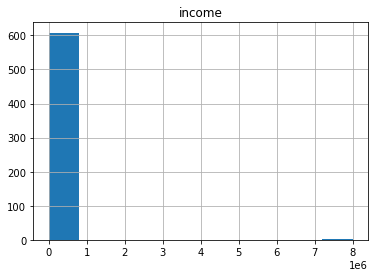

In [182]:
df_final4.hist(column='income')

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

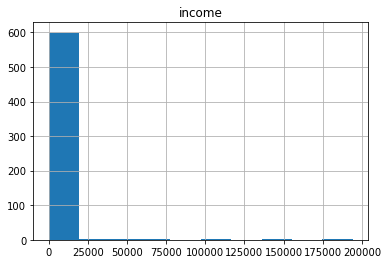

In [183]:
df_var_income_ol = df_final4[df_final4['income']<1*(10**6)]
df_var_income_ol.hist(column='income')

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

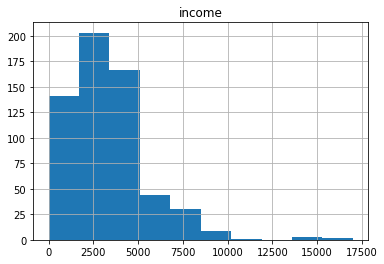

In [184]:
# right-skewed distribution

df_var_income_ol2 = df_final4[df_final4['income']<20000]
df_var_income_ol2.hist(column='income')

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

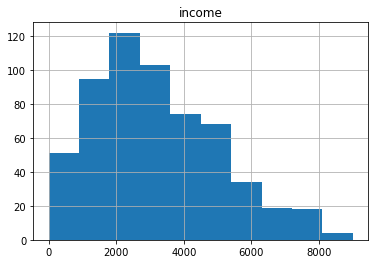

In [185]:
df_var_income_ol3 = df_final4[df_final4['income']<10000]

df_var_income_ol3.hist(column='income')

In [186]:
# high income class, outliers of more than EUR 10,000 net monthly income will be omitted

df_final5 = df_final4[df_final4['income']<10000]
df_final5.sort_values(by=['income'], ascending=False).head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
673,1.00,Weiblich,27,9000.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",80805,PU,sehr zentral,kreisfreie Großstadt,Bayern,Oberbayern,"München, Kreisfreie Stadt",1694.96,487.50,2182.46,0.00,9992.40,107.80,143.27,0.00,0.00,0.00,0.00,143.27,10243.47,1536.46,4334.64,1152.00,19449.03,42.00,45.00,25.00,17.00,9.00,3,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.00,77.00,393.00,19.00,63.00,26.00,12.00,64.00,3.00,10.00,-16.00,-33.00,39.00,-14.00,1.00
579,0.00,Weiblich,34,9000.00,Einer anderen Partei,Realschulabschluss (Mittlere Reife) oder gleic...,10557,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,643.08,487.50,1130.58,0.00,3433.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,3540.80,1680.20,4334.64,1152.00,11838.21,80.00,37.00,20.00,30.00,89.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421.00,286.00,331.00,19.00,232.00,69.00,47.00,54.00,3.00,38.00,-11.00,10.00,34.00,-27.00,-51.00
471,1.00,Weiblich,42,8500.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",81375,PU,sehr zentral,kreisfreie Großstadt,Bayern,Oberbayern,"München, Kreisfreie Stadt",796.12,409.50,1205.62,0.00,1720.00,107.80,1253.64,0.00,0.00,0.00,0.00,1253.64,3081.44,1410.45,2607.30,1152.00,9456.81,60.00,40.00,65.00,40.00,59.00,2,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397.00,321.00,462.00,221.00,359.00,65.00,52.00,75.00,36.00,58.00,5.00,12.00,10.00,-4.00,-1.00
294,3.00,Weiblich,22,8500.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",46562,PU,sehr zentral,Städtischer Kreis,Nordrhein-Westfalen,Düsseldorf,Wesel,867.96,455.00,1322.96,0.00,3238.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,5028.91,2539.31,3689.00,1152.00,13732.18,65.00,46.00,14.00,37.00,26.00,1,Benzin,NaN,Diesel,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,355.00,199.00,58.00,54.00,149.00,58.00,32.00,9.00,9.00,24.00,-7.00,-14.00,-5.00,-28.00,-2.00
634,1.00,Weiblich,19,8000.00,Bündnis 90/Die Grünen,Allgemeine oder fachgebundene Hochschulreife/A...,72124,IN,zentral,Städtischer Kreis,Baden-Württemberg,Tübingen,Reutlingen,7.35,366.60,373.95,0.00,1126.00,107.80,1855.01,0.00,0.00,0.00,0.00,1855.01,3088.81,971.33,2027.90,1152.00,7613.99,35.00,25.00,83.00,67.00,57.00,2,Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,571.00,319.00,596.00,363.00,488.00,93.00,52.00,97.00,59.00,79.00,58.00,27.00,14.00,-8.00,22.00


In [187]:
df_final5.sort_values(by=['income'], ascending=True).head(30)

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
102,1.00,Männlich,47,0.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",74594,PR,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Baden-Württemberg,Stuttgart,Schwäbisch Hall,104.22,33.60,137.82,0.00,0.00,0.00,4667.06,0.00,0.00,0.00,0.00,4667.06,4667.06,1814.44,2201.72,1152.00,9973.04,30.00,30.00,25.00,60.00,50.00,1,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,589.00,221.00,262.00,313.00,329.00,96.00,36.00,43.00,51.00,54.00,66.00,6.00,18.00,-9.00,4.00
222,1.00,Weiblich,68,0.00,SPD,Allgemeine oder fachgebundene Hochschulreife/A...,44795,PU,sehr zentral,kreisfreie Großstadt,Nordrhein-Westfalen,Arnsberg,"Bochum, Kreisfreie Stadt",1838.20,487.50,2325.70,0.00,0.00,0.00,1790.91,0.00,0.00,0.00,0.00,1790.91,1790.91,2347.58,1596.97,1152.00,9213.16,46.00,38.00,70.00,74.00,69.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.00,405.00,91.00,434.00,375.00,23.00,66.00,15.00,71.00,61.00,-23.00,28.00,-55.00,-3.00,-8.00
463,3.00,Männlich,23,0.00,Die Linke,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",71334,PU,sehr zentral,Städtischer Kreis,Baden-Württemberg,Stuttgart,Rems-Murr-Kreis,432.32,455.00,887.32,0.00,532.00,107.80,1790.91,1790.91,1855.01,0.00,0.00,5436.83,6076.63,1530.07,1155.90,1152.00,10801.92,39.00,61.00,67.00,73.00,62.00,2,Benzin,NaN,Benzin,NaN,Diesel,NaN,NaN,NaN,NaN,NaN,488.00,156.00,401.00,563.00,285.00,79.00,25.00,65.00,92.00,46.00,40.00,-36.00,-2.00,19.00,-16.00
213,2.00,Männlich,58,0.00,CDU/CSU,Realschulabschluss (Mittlere Reife) oder gleic...,97070,IN,zentral,kreisfreie Großstadt,Bayern,Unterfranken,"Würzburg, Kreisfreie Stadt",1196.20,468.00,1664.20,0.00,2096.00,107.80,4637.52,2686.36,0.00,0.00,0.00,7323.89,9527.69,2980.92,1216.74,1152.00,16541.55,35.00,20.00,5.00,10.00,16.00,1,Diesel,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.00,93.00,27.00,548.00,100.00,42.00,15.00,4.00,89.00,16.00,7.00,-5.00,-1.00,79.00,0.00
525,0.00,Männlich,21,0.00,CDU/CSU,Allgemeine oder fachgebundene Hochschulreife/A...,64409,PU,sehr zentral,Städtischer Kreis,Hessen,Darmstadt,Darmstadt-Dieburg,1400.40,455.00,1855.40,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1865.10,1098.11,1152.00,6078.41,72.00,74.00,61.00,66.00,81.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.00,540.00,240.00,581.00,565.00,35.00,88.00,39.00,95.00,92.00,-37.00,14.00,-22.00,29.00,11.00
98,2.00,Männlich,23,0.00,FDP,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",76593,IN,zentral,Städtischer Kreis,Baden-Württemberg,Karlsruhe,Rastatt,34.74,0.03,34.77,0.00,532.00,107.80,0.18,0.18,0.00,0.00,0.00,0.36,640.16,1513.78,2317.60,1152.00,5658.31,47.00,46.00,19.00,50.00,42.00,1,Benzin,NaN,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,614.00,498.00,409.00,265.00,583.00,100.00,81.00,67.00,43.00,95.00,53.00,35.00,48.00,-7.00,53.00
582,0.00,Weiblich,25,0.00,Bündnis 90/Die Grünen,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",35037,IN,zentral,Ländlicher Kreis mit Verdichtungsansätzen,Hessen,Gießen,Marburg-Biedenkopf,1181.16,455.00,1636.16,0.00,532.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,639.80,1421.14,1100.86,1152.00,5949.96,69

In [188]:
len(df_final5)

588

In [189]:
df_final5.columns

Index(['no_cars', 'gender', 'age', 'income', 'political_party', 'education',
       'postal_code', 'EUROSTAT', 'RLK2022', 'KTU2022', 'federal_state',
       'NUTS2_NAME', 'NUTS3_NAME', 'CO2_housing', 'CO2_electricity',
       'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight',
       'CO2_public_transport', 'CO2_car1', 'CO2_car2', 'CO2_car3', 'CO2_car4',
       'CO2_car5', 'CO2_car_total', 'CO2_mobility', 'CO2_food',
       'CO2_other_consumption', 'public_emission', 'CO2_total',
       'belief_housing_electricity', 'belief_mobility', 'belief_food',
       'belief_other_consumption', 'belief_total', 'batch', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10',
       'actual_rank_CO2_housing_electricity1', 'actual_rank_CO2_mobility1',
       'actual_rank_CO2_food1', 'actual_rank_CO2_other_consumption1',
       'actual_rank_CO2_total1', 'actual_rank_CO2_housing_electricity2',
       'actual_rank_CO2_mob

In [190]:
### Columns in the final data for R
df_final_save = df_final5[['age', 'income', 'political_party', 'education', 
                     'EUROSTAT', 'RLK2022', 'KTU2022', 'federal_state',
                     'CO2_housing', 'CO2_electricity', 'CO2_housing_electricity', 'CO2_cruise', 'CO2_flight', 'CO2_public_transport', 'CO2_car1', 'CO2_car2',
       'CO2_car3', 'CO2_car4', 'CO2_car5', 'CO2_car_total', 'CO2_mobility',
       'CO2_food', 'CO2_other_consumption', 'public_emission', 'CO2_total', 
                          'belief_diff_housing_electricity', 'belief_diff_mobility',
       'belief_diff_food', 'belief_diff_other_consumption',
       'belief_diff_total', 'batch', 'engine_1',
       'engine_2', 'engine_3', 'engine_4', 'engine_5', 'engine_6', 'engine_7',
       'engine_8', 'engine_9', 'engine_10']]

In [191]:
df_final_save.head()

,age,income,political_party,education,EUROSTAT,RLK2022,KTU2022,federal_state,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10
25,65,3000.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",PU,zentral,Städtischer Kreis,Saarland,5038.20,1053.00,6091.20,0.00,2440.00,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3872.73,1494.63,3766.10,1152.00,16376.66,-31.00,-14.00,5.00,-68.00,-15.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,59,800.00,Keine Angabe,Allgemeine oder fachgebundene Hochschulreife/A...,PU,sehr zentral,kreisfreie Großstadt,Hessen,1785.00,487.50,2272.50,2710.00,5985.00,107.80,1944.61,1037.12,0.00,0.00,0.00,2981.73,11784.53,1731.02,1444.88,1152.00,18384.93,-38.00,-42.00,-26.00,23.00,-76.00,1,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN
27,60,1750.00,Keine Angabe,"Berufsausbildung, Lehre oder Ausbildung an ein...",IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,200.10,663.00,863.10,0.00,598.50,107.80,0.00,0.00,0.00,0.00,0.00,0.00,706.30,1180.24,2433.48,1152.00,6335.12,40.00,11.00,49.00,9.00,57.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,73,2500.00,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,IN,sehr zentral,Städtischer Kreis,Bayern,648.48,975.00,1623.48,0.00,2287.60,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3720.33,1709.01,4152.13,1152.00,12356.94,-2.00,-31.00,-9.00,-36.00,-8.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,43,2500.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",PU,sehr zentral,kreisfreie Großstadt,Berlin,1923.49,390.00,2313.49,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1735.13,3766.10,1152.00,9074.52,-43.00,-2.00,-26.00,-53.00,-1.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
### save the cleaned data for Regression

df_final_save.to_csv('data_cleaned_R_final_batch_engine.csv')

In [193]:
#### Continue with the exploratory data analysis with: df_final2

df_final5.head()

,no_cars,gender,age,income,political_party,education,postal_code,EUROSTAT,RLK2022,KTU2022,federal_state,NUTS2_NAME,NUTS3_NAME,CO2_housing,CO2_electricity,CO2_housing_electricity,CO2_cruise,CO2_flight,CO2_public_transport,CO2_car1,CO2_car2,CO2_car3,CO2_car4,CO2_car5,CO2_car_total,CO2_mobility,CO2_food,CO2_other_consumption,public_emission,CO2_total,belief_housing_electricity,belief_mobility,belief_food,belief_other_consumption,belief_total,batch,engine_1,engine_2,engine_3,engine_4,engine_5,engine_6,engine_7,engine_8,engine_9,engine_10,actual_rank_CO2_housing_electricity1,actual_rank_CO2_mobility1,actual_rank_CO2_food1,actual_rank_CO2_other_consumption1,actual_rank_CO2_total1,actual_rank_CO2_housing_electricity2,actual_rank_CO2_mobility2,actual_rank_CO2_food2,actual_rank_CO2_other_consumption2,actual_rank_CO2_total2,belief_diff_housing_electricity,belief_diff_mobility,belief_diff_food,belief_diff_other_consumption,belief_diff_total
25,1.00,Weiblich,65,3000.00,CDU/CSU,"(Fach-) Hochschulabschluss (Bachelor, Master, ...",66440,PU,zentral,Städtischer Kreis,Saarland,Saarland,Saarpfalz-Kreis,5038.20,1053.00,6091.20,0.00,2440.00,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3872.73,1494.63,3766.10,1152.00,16376.66,33.00,57.00,63.00,75.00,32.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,263.00,420.00,43.00,105.00,2.00,43.00,68.00,7.00,17.00,-31.00,-14.00,5.00,-68.00,-15.00
26,2.00,Weiblich,59,800.00,Keine Angabe,Allgemeine oder fachgebundene Hochschulreife/A...,65933,PU,sehr zentral,kreisfreie Großstadt,Hessen,Darmstadt,"Frankfurt am Main, Kreisfreie Stadt",1785.00,487.50,2272.50,2710.00,5985.00,107.80,1944.61,1037.12,0.00,0.00,0.00,2981.73,11784.53,1731.02,1444.88,1152.00,18384.93,62.00,52.00,75.00,55.00,88.00,1,Benzin,Benzin,Benzin,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,149.00,62.00,302.00,477.00,76.00,24.00,10.00,49.00,78.00,12.00,-38.00,-42.00,-26.00,23.00,-76.00
27,0.00,Weiblich,60,1750.00,Keine Angabe,"Berufsausbildung, Lehre oder Ausbildung an ein...",95028,IN,peripher,Ländlicher Kreis mit Verdichtungsansätzen,Bayern,Oberfranken,"Hof, Kreisfreie Stadt",200.10,663.00,863.10,0.00,598.50,107.80,0.00,0.00,0.00,0.00,0.00,0.00,706.30,1180.24,2433.48,1152.00,6335.12,40.00,70.00,42.00,30.00,32.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491.00,495.00,558.00,242.00,546.00,80.00,81.00,91.00,39.00,89.00,40.00,11.00,49.00,9.00,57.00
28,1.00,Männlich,73,2500.00,SPD,Realschulabschluss (Mittlere Reife) oder gleic...,63741,IN,sehr zentral,Städtischer Kreis,Bayern,Unterfranken,"Aschaffenburg, Kreisfreie Stadt",648.48,975.00,1623.48,0.00,2287.60,0.00,1432.73,0.00,0.00,0.00,0.00,1432.73,3720.33,1709.01,4152.13,1152.00,12356.94,45.00,75.00,60.00,40.00,40.00,1,Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267.00,271.00,315.00,25.00,200.00,43.00,44.00,51.00,4.00,32.00,-2.00,-31.00,-9.00,-36.00,-8.00
30,0.00,Männlich,43,2500.00,Einer anderen Partei,"Berufsausbildung, Lehre oder Ausbildung an ein...",13059,PU,sehr zentral,kreisfreie Großstadt,Berlin,Berlin,Berlin,1923.49,390.00,2313.49,0.00,0.00,107.80,0.00,0.00,0.00,0.00,0.00,0.00,107.80,1735.13,3766.10,1152.00,9074.52,66.00,90.00,75.00,60.00,63.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.00,540.00,300.00,43.00,384.00,23.00,88.00,49.00,7.00,62.00,-43.00,-2.00,-26.00,-53.00,-1.00


In [194]:
df_final5.to_csv('data_cleaned_descriptive_analysis_final_batch_engine.csv')

### Comparing the 1, 2, 3 batches

- columns to compare: 'CO2_mobility', 'CO2_flight', 'CO2_car_total'

In [195]:
df_final5.groupby(['batch'])['batch'].count()

batch
1    254
2    163
3    171
Name: batch, dtype: int64

In [196]:
round(100*171/588,2)

29.08

In [197]:
batch12 = df_final5[(df_final5['batch'] == 1) | (df_final5['batch'] == 2)] 
batch3 = df_final5[df_final5['batch'] == 3] 
print(len(batch12))
print(len(batch3))

417
171


<AxesSubplot:>

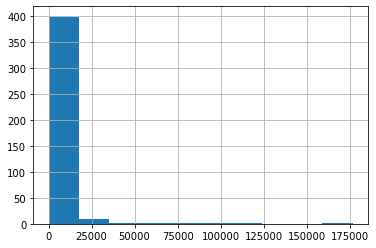

In [198]:
batch12['CO2_mobility'].hist()

<AxesSubplot:>

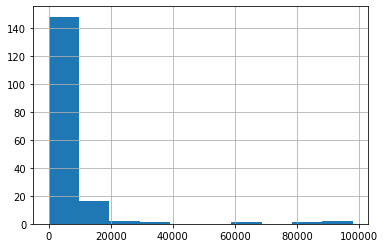

In [199]:
batch3['CO2_mobility'].hist()

In [200]:
batch12['CO2_mobility'].describe()

count      417.00
mean      6344.51
std      15647.53
min          0.00
25%       1113.36
50%       3215.81
75%       6207.80
max     176807.10
Name: CO2_mobility, dtype: float64

In [201]:
batch3['CO2_mobility'].describe()

count     171.00
mean     6127.61
std     13118.98
min         0.00
25%      1035.31
50%      3366.98
75%      5733.45
max     97951.30
Name: CO2_mobility, dtype: float64

##### Flights

<AxesSubplot:>

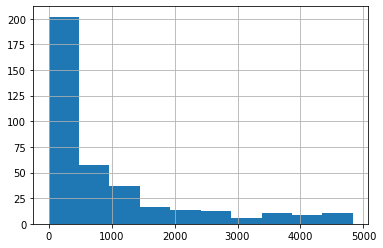

In [202]:
hist_data = batch12[batch12['CO2_flight'] < batch12['CO2_flight'].quantile(0.9)]
hist_data['CO2_flight'].hist()

<AxesSubplot:>

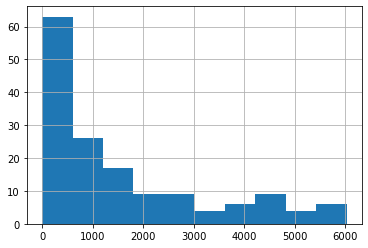

In [203]:
hist_data = batch3[batch3['CO2_flight'] < batch3['CO2_flight'].quantile(0.9)]
hist_data['CO2_flight'].hist()

In [204]:
# Creating the two different dataset 

data1 = batch12[batch12['CO2_flight'] < batch12['CO2_flight'].quantile(0.9)]
data2 = batch3[batch3['CO2_flight'] < batch3['CO2_flight'].quantile(0.9)]

batch12_flight = data1['CO2_flight'] # work + personal

batch3_flight = data2['CO2_flight'] #only work related 


In [205]:
batch12_flight.describe()

count    374.00
mean     852.60
std     1247.85
min        0.00
25%        0.00
50%      266.00
75%     1204.00
max     4832.00
Name: CO2_flight, dtype: float64

In [206]:
batch3_flight.describe()

count    153.00
mean    1498.18
std     1742.59
min        0.00
25%        0.00
50%      798.00
75%     2408.00
max     6031.00
Name: CO2_flight, dtype: float64

## one-way ANOVA

In [207]:
## ONE-way ANOVA 
## H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
## H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

from scipy.stats import f_oneway
f_oneway(batch12_flight, batch3_flight) ### reject H0, 

F_onewayResult(statistic=22.791980956316962, pvalue=2.3443052774260043e-06)

In [208]:
# fail to reject H0: the means of all the population are equal
f_oneway(batch12['CO2_flight'], batch3['CO2_flight'])

F_onewayResult(statistic=2.015368436415039, pvalue=0.15624520160985503)

In [209]:
# fail to reject H0: the means of all the population are equal
f_oneway(batch12['CO2_car_total'], batch3['CO2_car_total'])

F_onewayResult(statistic=2.2739860571069284, pvalue=0.13210005471590572)

In [210]:
##### Cars

<AxesSubplot:>

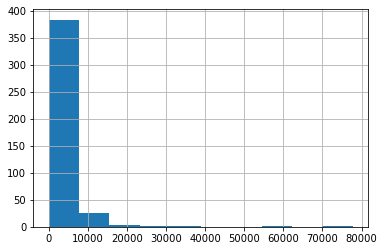

In [211]:
batch12['CO2_car_total'].hist()

<AxesSubplot:>

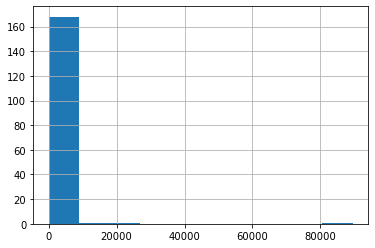

In [212]:
batch3['CO2_car_total'].hist()

<AxesSubplot:>

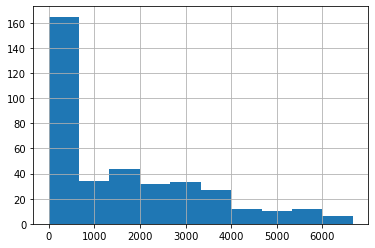

In [213]:
hist_data = batch12[batch12['CO2_car_total'] < batch12['CO2_car_total'].quantile(0.9)]
hist_data['CO2_car_total'].hist()

<AxesSubplot:>

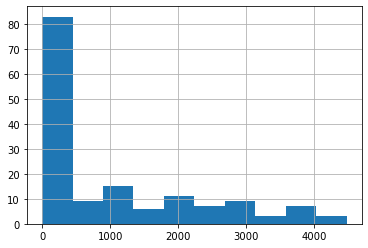

In [214]:
hist_data = batch3[batch3['CO2_car_total'] < batch3['CO2_car_total'].quantile(0.9)]
hist_data['CO2_car_total'].hist()

In [215]:
# Creating the two different dataset 

data1 = batch12[batch12['CO2_car_total'] < batch12['CO2_car_total'].quantile(0.9)]
data2 = batch3[batch3['CO2_car_total'] < batch3['CO2_car_total'].quantile(0.9)]

batch12_car = data1['CO2_car_total'] # work + personal

batch3_car = data2['CO2_car_total'] #only work related 

In [216]:
f_oneway(batch12_car, batch3_car)

F_onewayResult(statistic=17.259753671897645, pvalue=3.804454793665776e-05)